In [106]:

# https://www.kaggle.com/ternaryrealm/lstm-time-series-explorations-with-keras
# https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/
    
import sys
import math

# !{sys.executable} -m pip install --upgrade pip

try:
    import numpy as np
except ModuleNotFoundError:
    !{sys.executable} -m pip install numpy
    import numpy as np
    

try:
    import pandas as pd
except ModuleNotFoundError:
    !{sys.executable} -m pip install pandas
    import pandas as pd

    
try:
    import matplotlib
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    !{sys.executable} -m pip install matplotlib
    import matplotlib.pyplot as plt

    
try:
    import scipy
    import scipy.io
except ModuleNotFoundError:
    !{sys.executable} -m pip install scipy
    import scipy

        
try:
    import sklearn
except ModuleNotFoundError:
    !{sys.executable} -m pip install sklearn
    import sklearn

        
try:
    import keras
except ModuleNotFoundError:
    !{sys.executable} -m pip install keras
    import keras
    

try:
    import keras_metrics
except ModuleNotFoundError:
    !{sys.executable} -m pip install keras_metrics
    import keras_metrics

from keras.models import Sequential
from keras.layers import Dense
import keras_metrics
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [107]:

"""
Make plot outputs appear and be stored within the notebook
"""
%matplotlib inline

"""
fix random seed for reproducibility
"""
seed = 7
np.random.seed(seed)

In [108]:
# load dataset
data = pd.read_csv("dataset_PTO.csv", header=None)
cat = pd.read_csv("Category_PTO.csv", header=None)
dataset = data #.values
catset = cat #.values
# split into input (X) and output (Y) variables
X = dataset #.astype(float)
Y = catset #.astype(float)

from sklearn.model_selection import train_test_split  
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.30)  

In [109]:
%%capture

# create model
model = Sequential()
model.add(Dense(60, input_dim=trainX.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Compile model
model.fit(trainX, trainY, epochs=100, batch_size=10, verbose=2)

In [110]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score, mean_squared_error
predY = model.predict_classes(testX)
print(classification_report(testY,predY))


             precision    recall  f1-score   support

        0.0       0.92      0.82      0.87       146
        1.0       0.83      0.92      0.87       133

avg / total       0.88      0.87      0.87       279



Text(0.5,1,'2-class Precision-Recall curve')

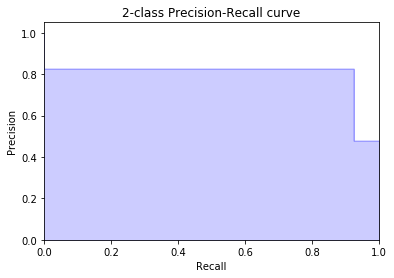

In [111]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score, mean_squared_error
from sklearn.utils.fixes import signature

scoreY = model.predict_classes(testX)
precision, recall, _ = precision_recall_curve(testY, scoreY)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
# plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
#          average_precision))
plt.title('2-class Precision-Recall curve')